# Exploratory Data Analysis

In [1]:
!pip install pandas_profiling
!pip install sweetviz

     |████████████████████████████████| 15.1MB 777kB/s eta 0:00:01
     |████████████████████████████████| 30.7MB 1.8MB/s eta 0:00:01    |██████▉                         | 6.5MB 243kB/s eta 0:01:40     |█████████████████████████████▍  | 28.1MB 492kB/s eta 0:00:06
     |████████████████████████████████| 10.4MB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 133kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 8.5MB 363kB/s eta 0:00:01     |████▏                           | 1.1MB 1.1MB/s eta 0:00:07     |██████████▉                     | 2.9MB 593kB/s eta 0:00:10
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
  Found existing installation: Jinja2 2.10.3
    Uninstalling Jinja2-2.10.3:
      Successfully uninstalled Jinja2-2.10.3
  Found existing installation: matplotlib 3.1.1

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data1 = pd.read_csv("data_clean.csv")

In [4]:
data1.tail(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
148,149,30.0,193.0,6.9,70,9,26,2010,70,C
149,150,NaN,145.0,13.2,77,9,27,2010,77,PS
150,151,14.0,191.0,14.3,75,9,28,2010,75,S
151,152,18.0,131.0,8.0,76,9,29,2010,76,PS
152,153,20.0,223.0,11.5,68,9,30,2010,68,S
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [4]:
#Data Structure 
type(data1)
data1.shape

(158, 10)

In [6]:
#data types
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

# Data type conversion

In [8]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [9]:
data2=data1.iloc[:,1:]

In [10]:
data2.head(2)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C


In [11]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data=data2.copy()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [13]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')    

#data['Wind']=data['Wind'].astype('int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


# Duplicates

In [20]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [21]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [22]:
#Count of duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [23]:
data[~data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [24]:
data_cleaned1=data.drop_duplicates()

In [25]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [29]:
data_cleaned1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [30]:
data_cleaned2=data_cleaned1.drop(10,axis=0)

In [31]:
data_cleaned2.head(12)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
5,28.0,NaN,14.9,66.0,5.0,6,2010,66,C
6,23.0,299.0,8.6,65.0,5.0,7,2010,65,PS
7,19.0,99.0,13.8,59.0,5.0,8,2010,59,C
8,8.0,19.0,20.1,61.0,5.0,9,2010,61,PS
9,NaN,194.0,8.6,69.0,5.0,10,2010,69,S


# Rename the columns

In [78]:
data_cleaned2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [79]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [80]:
data_cleaned3.head(12)

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
5,28.0,NaN,14.9,66.0,5.0,6,2010,66,C
6,23.0,299.0,8.6,65.0,5.0,7,2010,65,PS
7,19.0,99.0,13.8,59.0,5.0,8,2010,59,C
8,8.0,19.0,20.1,61.0,5.0,9,2010,61,PS
9,NaN,194.0,8.6,69.0,5.0,10,2010,69,S


# Outlier Detection

<AxesSubplot:>

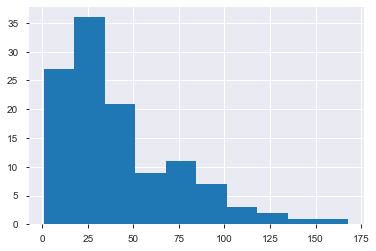

In [81]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

<AxesSubplot:>

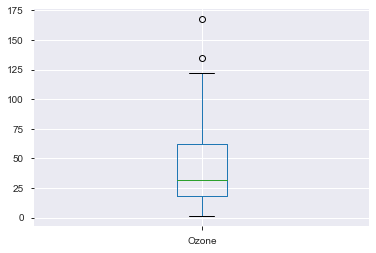

In [82]:
#Box plot
data_cleaned3.boxplot(column=['Ozone'])

In [83]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    118.000000
mean      42.110169
std       32.638864
min        1.000000
25%       18.000000
50%       31.500000
75%       62.500000
max      168.000000
Name: Ozone, dtype: float64

In [84]:
data_cleaned3

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


<AxesSubplot:>

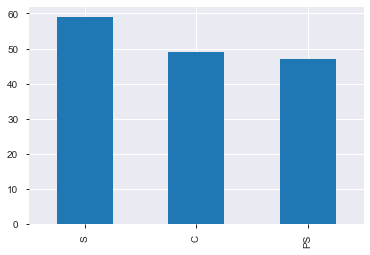

In [85]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

<AxesSubplot:>

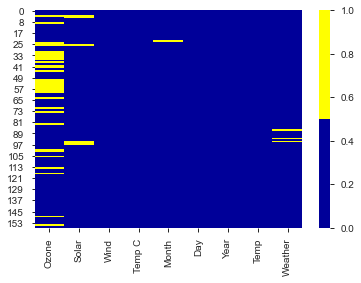

In [86]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [87]:
data_cleaned3.isnull().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
157    False
Length: 156, dtype: bool

In [88]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)]

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
5,28.0,NaN,14.9,66.0,5.0,6,2010,66,C
9,NaN,194.0,8.6,69.0,5.0,10,2010,69,S
23,32.0,92.0,12.0,61.0,NaN,24,2010,61,C
24,NaN,66.0,16.6,57.0,5.0,25,2010,57,PS
25,NaN,266.0,14.9,58.0,5.0,26,2010,58,C
26,NaN,NaN,8.0,57.0,5.0,27,2010,57,PS
31,NaN,286.0,8.6,78.0,6.0,1,2010,78,S
32,NaN,287.0,9.7,74.0,6.0,2,2010,74,C
33,NaN,242.0,16.1,67.0,6.0,3,2010,67,PS


In [89]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       6
Wind        0
Temp C      0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [90]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
mean

42.110169491525426

In [91]:
for i in data_cleaned3.columns:
    try:
        mean=data_cleaned3[i].mean()
        data_cleaned3[i]=data_cleaned3[i].fillna(mean)
    except:
        pass

In [92]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [93]:
data_cleaned3

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,67.0,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,72.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,74.0,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,62.0,5.0,4,2010,62,S
4,42.110169,185.366667,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,68.0,9.0,30,2010,68,S
153,41.000000,190.000000,7.4,67.0,5.0,1,2010,67,C
154,30.000000,193.000000,6.9,70.0,9.0,26,2010,70,PS
155,42.110169,145.000000,13.2,77.0,9.0,27,2010,77,S


In [94]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [95]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [96]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(tem)

In [97]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [98]:
data_cleaned3.shape

(156, 9)

In [99]:
obj_columns.shape

(156, 1)

In [100]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [101]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      0
Wind       0
Temp C     0
Month      0
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

# Scatter plot and Correlation analysis

In [102]:
data_cleaned3.columns



Index(['Ozone', 'Solar', 'Wind', 'Temp C', 'Month', 'Day', 'Year', 'Temp',
       'Weather'],
      dtype='object')

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/anaconda3/lib/python3.7/site-packages/st

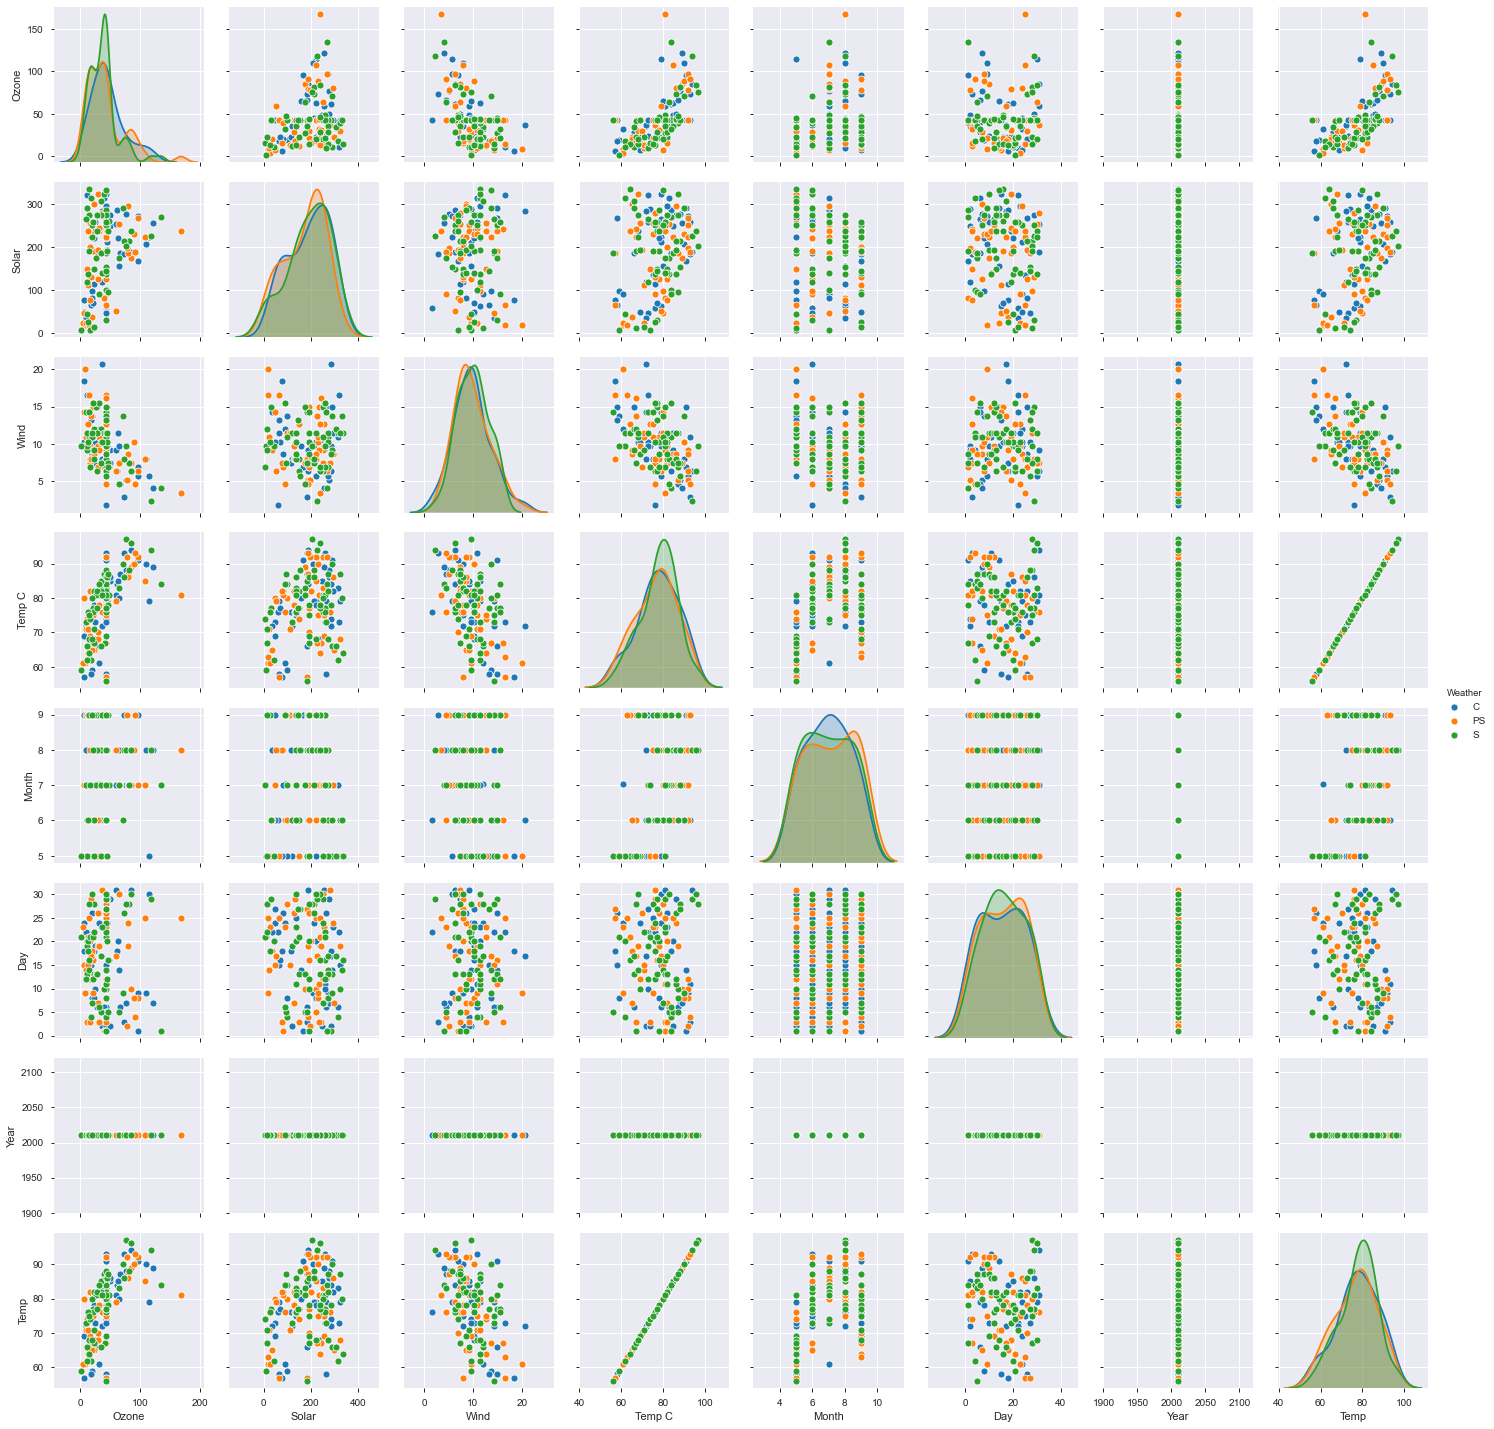

In [106]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3,)


In [46]:
#Correlation
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


# Transformations

#### Dummy Variable

In [107]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [48]:
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [49]:
data_cleaned4=data_cleaned4.dropna()



In [ ]:
data1["Weather"].value_counts

data1["Weather"].map({"S":1,"C":2,"PS":3})
data1["Weather"].replace("S",1)

#### Normalization of the data

In [39]:
import sklearn
sklearn.__version__

'0.24.1'

In [111]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [113]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [  nan, 145. ,  13.2, ...,   0. ,   0. ,   1. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [114]:
array = data_cleaned3.values

scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.3  0.27 0.  ]
 [0.21 0.34 0.33 0.39 0.  ]
 [0.07 0.43 0.57 0.44 0.  ]
 [0.1  0.94 0.52 0.15 0.  ]
 [0.25 0.55 0.66 0.   0.  ]]


In [116]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [117]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.73 -1.15 -1.43 -1.67  0.   -1.15 -0.67 -0.65  1.3 ]
 [-0.17 -0.76 -0.56 -0.61 -1.43 -1.56  0.   -0.61  1.49 -0.65 -0.77]
 [-0.91 -0.41  0.75 -0.4  -1.43 -1.45  0.   -0.4  -0.67  1.54 -0.77]
 [-0.73  1.44  0.44 -1.68 -1.43 -1.34  0.   -1.68 -0.67 -0.65  1.3 ]
 [  nan   nan  1.24 -2.32 -1.43 -1.23  0.   -2.32 -0.67 -0.65  1.3 ]]


# Speed up the EDA process

In [118]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

In [119]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')


Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
